# Customer Churn Data Analysis 

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/info/Downloads/Customer-Churn-Dataset.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
#check if any values are now NAN 
print ("Missing Totalcharges values:", df["TotalCharges"].isna().sum())

#Removing rows where totalcharges is missing
df = df.dropna(subset=["TotalCharges"])

Missing Totalcharges values: 11


In [7]:
#checking for missing values
print("\nMissing values in dataset:")
print (df.isnull().sum())


Missing values in dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
#check for duplicates 
duplicates = df.duplicated().sum()
print("\nDuplicate rows:", duplicates)

if duplicates > 0:
    df = df.drop_duplicates()


Duplicate rows: 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Exploratory Data Analysis

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
#Churn Distribution

import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\info\AppData\Local\Temp\ipykernel_3280\3522115082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


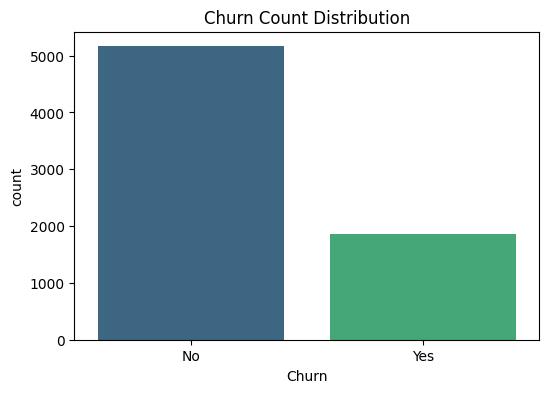

Churn Rate (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title("Churn Count Distribution")
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print ("Churn Rate (%):")
print (churn_rate)

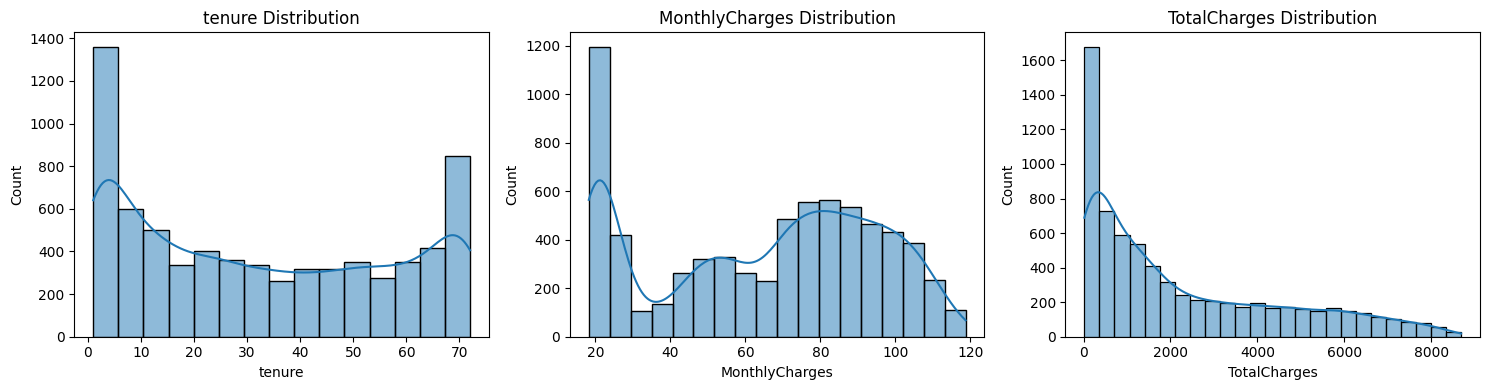

In [13]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

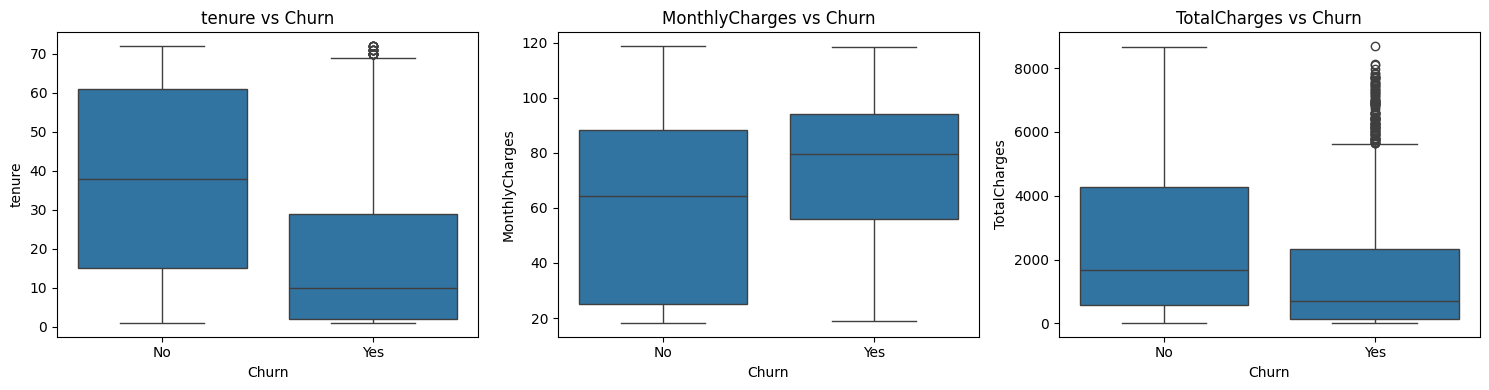

In [14]:
# Churn vs Numerical Columns

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()

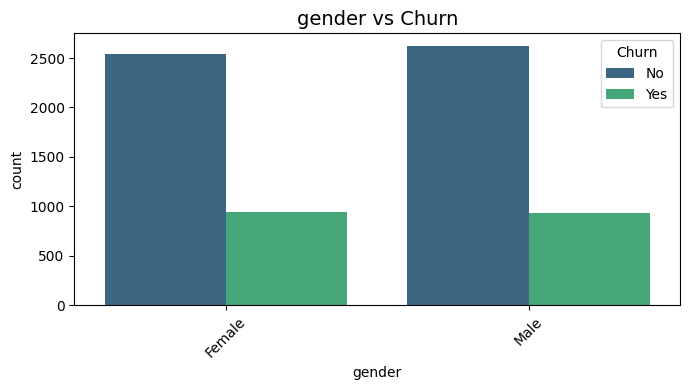

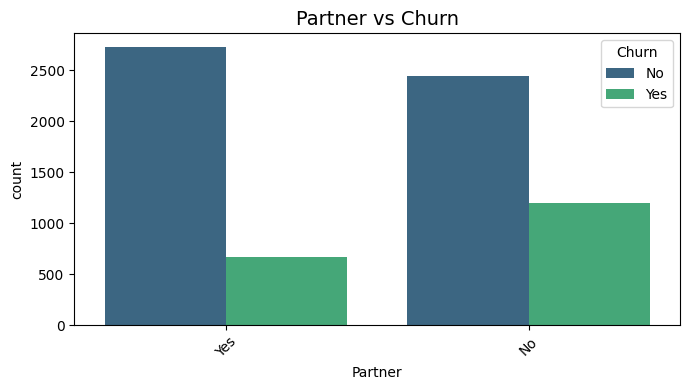

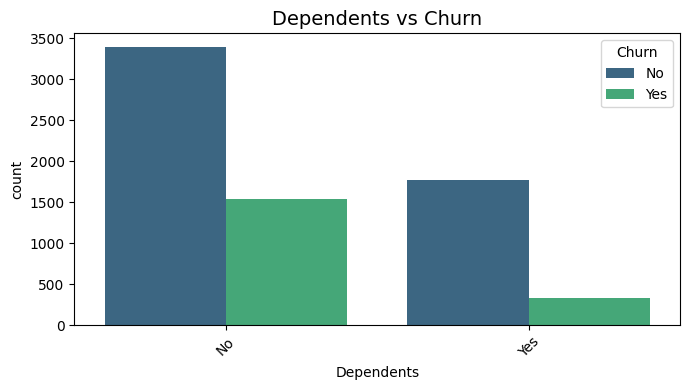

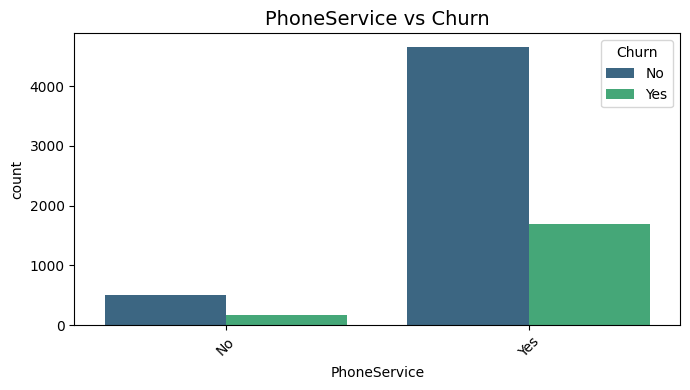

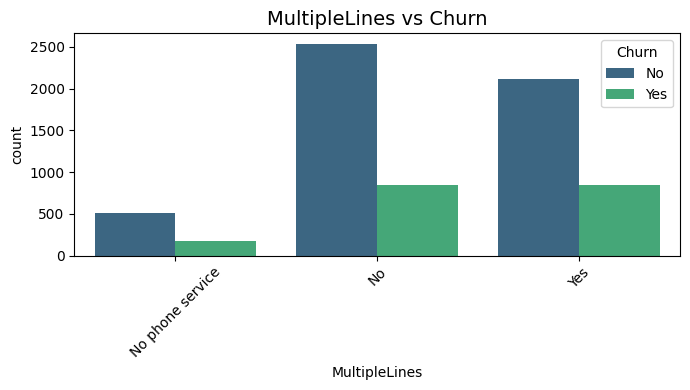

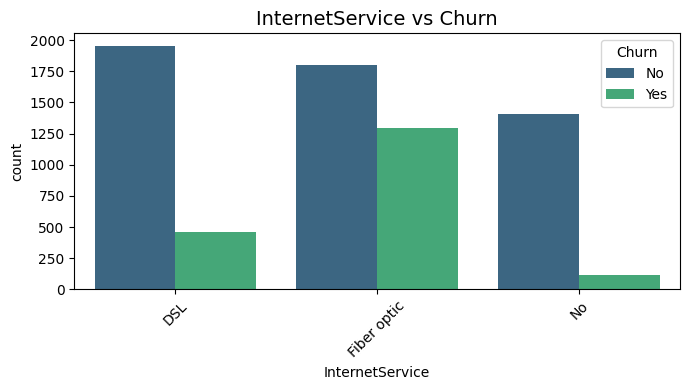

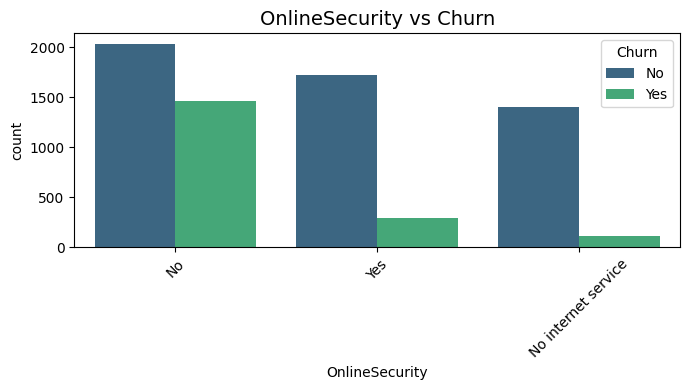

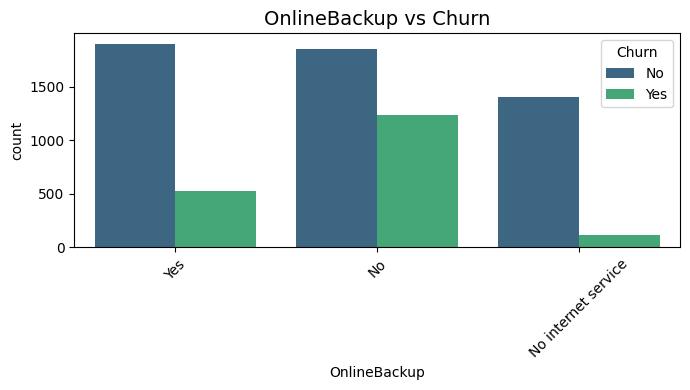

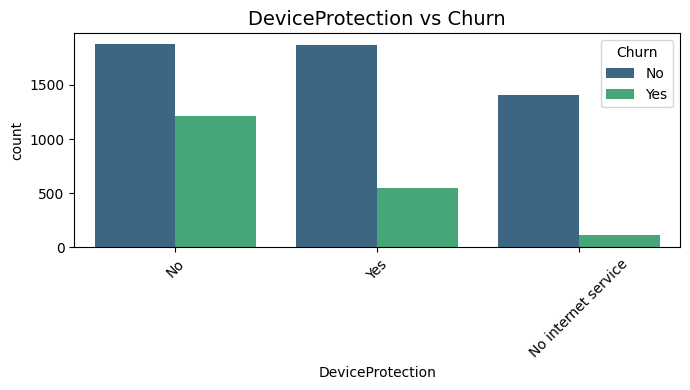

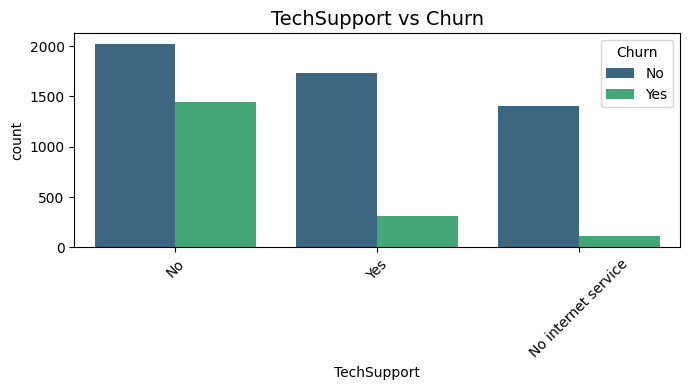

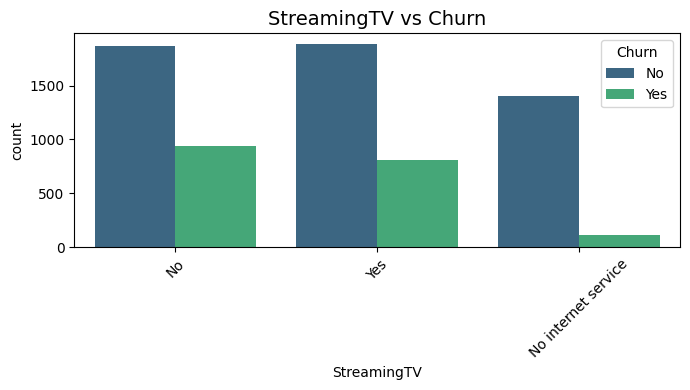

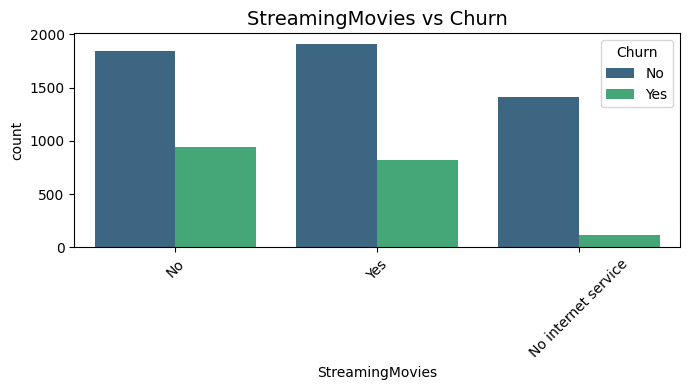

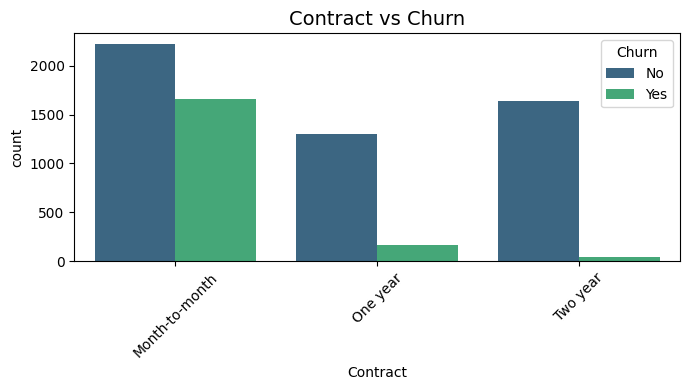

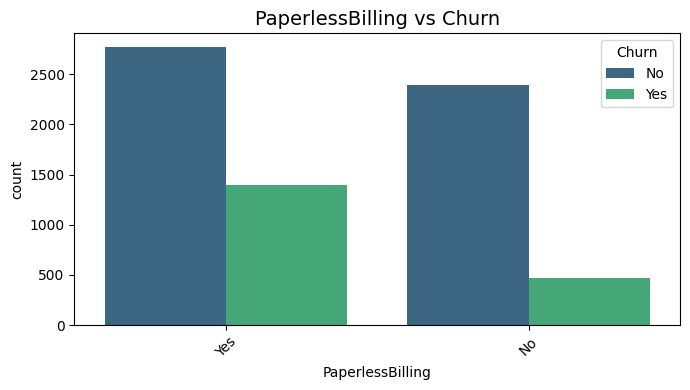

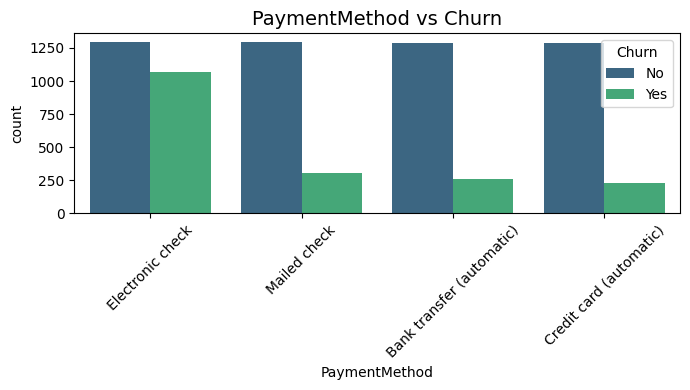

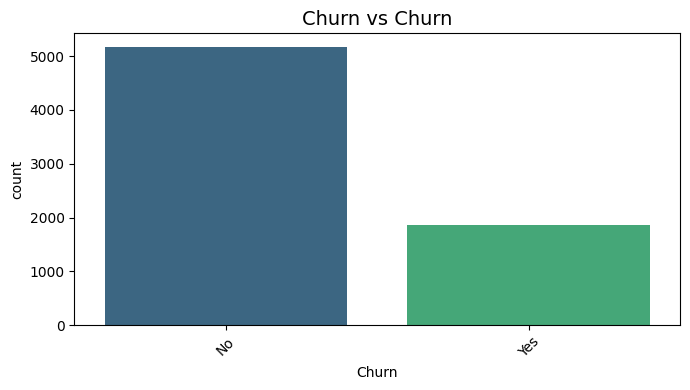

In [15]:
#Categorical Column Churn Analysis

cat_cols = df.select_dtypes(include='object').columns.drop(['customerID'])

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f"{col} vs Churn", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Data Visualisation

Detected Yes/No columns: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Numeric columns used in correlation: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']


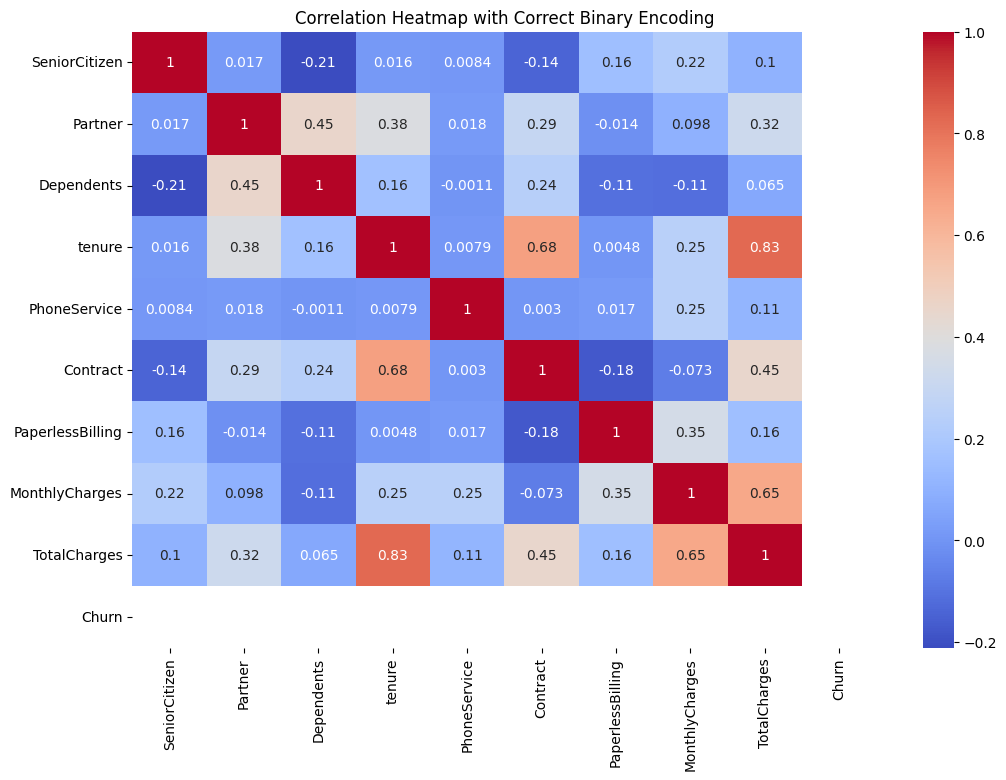

In [16]:
#Correlation Heatmap

corr_df = df.copy()

yes_no_cols = [col for col in corr_df.columns
               if corr_df[col].dtype == 'object'
               and set(corr_df[col].unique()) == {'Yes', 'No'}]

print ("Detected Yes/No columns:", yes_no_cols)

#Convert Yes/No to 1/0

for col in yes_no_cols:
    corr_df[col] = corr_df[col].map({'Yes':1, 'No':0})

corr_df['Churn'] = corr_df['Churn'].map({'Yes':1, 'No':0})


# Contract to numeric
corr_df['Contract'] = corr_df['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

numeric_df = corr_df.select_dtypes(include=['int64','float64'])
print("Numeric columns used in correlation:", numeric_df.columns.tolist())


plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Correct Binary Encoding")
plt.show()

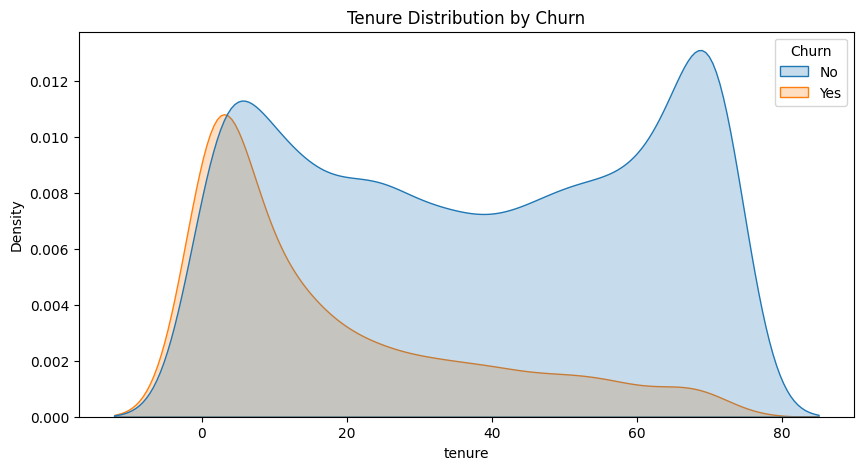

In [17]:
# Tenure vs Churn

plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True)
plt.title("Tenure Distribution by Churn")
plt.show()

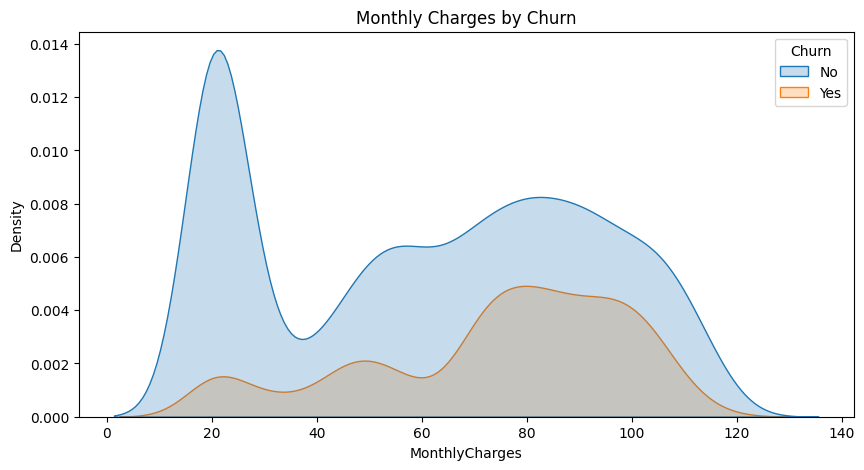

In [18]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges by Churn")
plt.show()

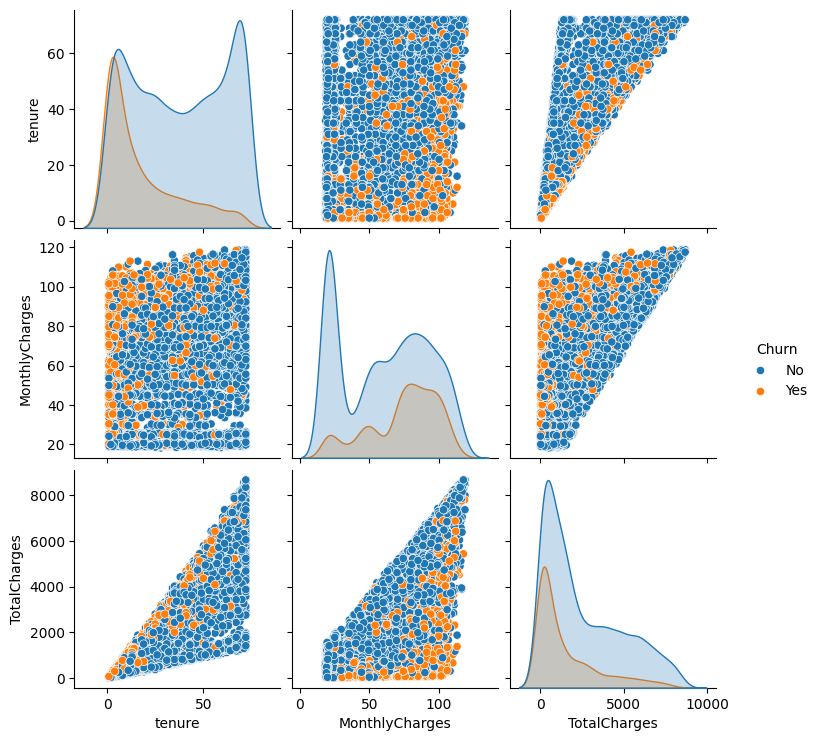

In [19]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue="Churn")
plt.show()

## Feature Engineering

In [20]:
# Identify the column types 

cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numeric Columns:",num_cols)

Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [21]:
df = df.drop("customerID", axis=1)

In [22]:
# Label encode Yes/No columns 

yes_no_cols = [col for col in df.columns
               if set (df[col].unique()) == {'Yes', 'No'}]

print ("Yes/No Columns:", yes_no_cols)

for col in yes_no_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})
    


Yes/No Columns: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [23]:
df = pd.get_dummies(df, drop_first=True)



In [24]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5625, 30)
Test shape: (1407, 30)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm_log)


Logistic Regression Accuracy: 0.8052594171997157

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Confusion Matrix:
 [[918 115]
 [159 215]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)


Random Forest Accuracy: 0.7931769722814499

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Confusion Matrix:
 [[926 107]
 [184 190]]


In [28]:
pip install xgboost


In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)


XGBoost Accuracy: 0.7874911158493249

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[906 127]
 [172 202]]


In [30]:
# Compare All models

model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
}

import pandas as pd
results_df = pd.DataFrame(model_results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.805259
1        Random Forest  0.793177
2              XGBoost  0.787491


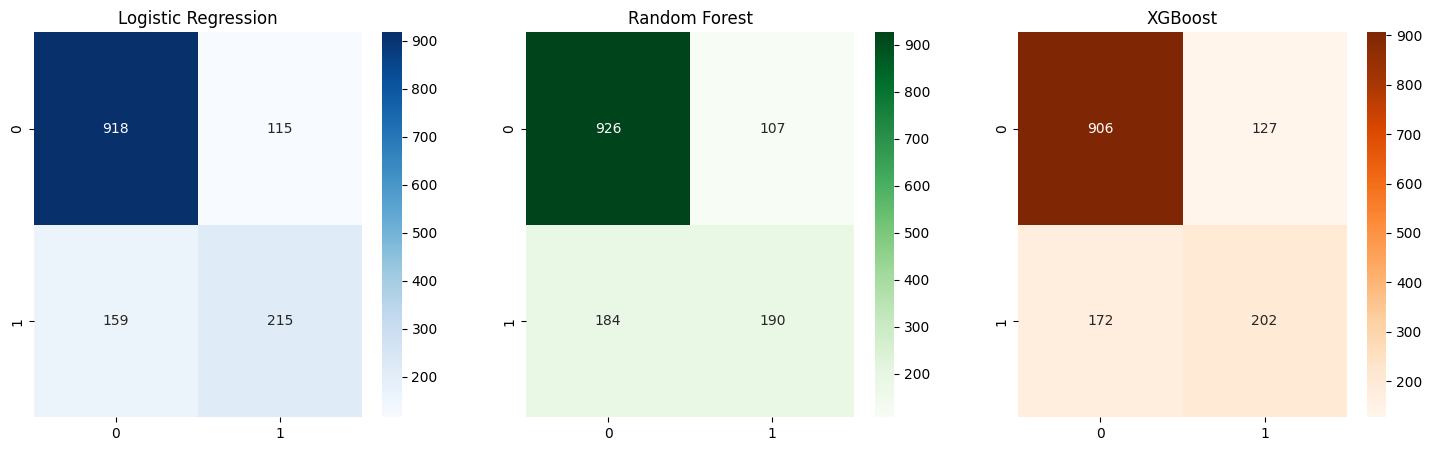

In [31]:
# Confusion matrix Heatmaps 

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("XGBoost")

plt.show()


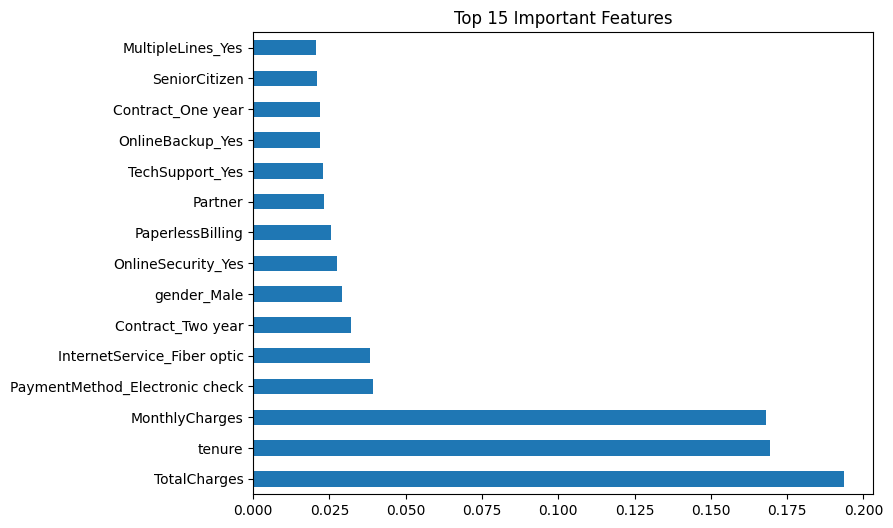

In [32]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp.nlargest(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Important Features")
plt.show()

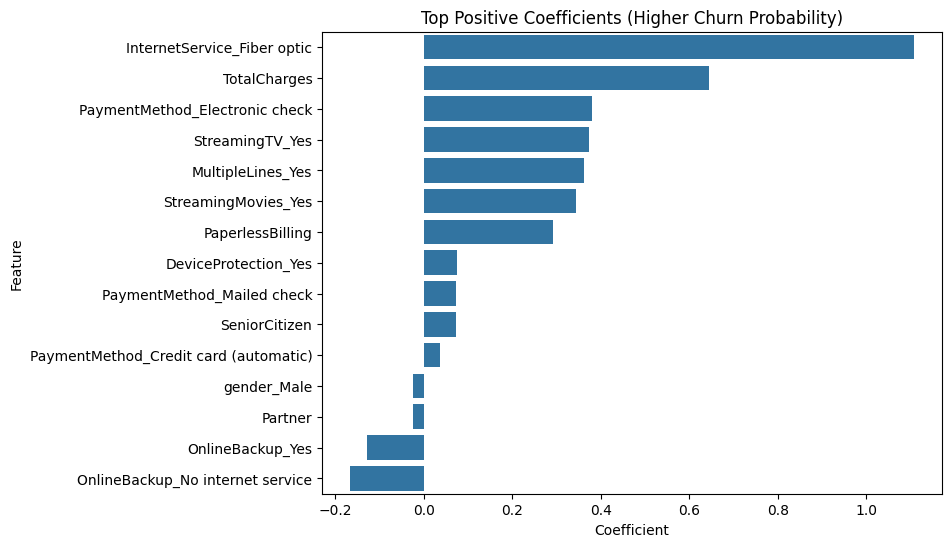

In [33]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_model.coef_[0]
})

coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=coef_df.head(15), x="Coefficient", y="Feature")
plt.title("Top Positive Coefficients (Higher Churn Probability)")
plt.show()


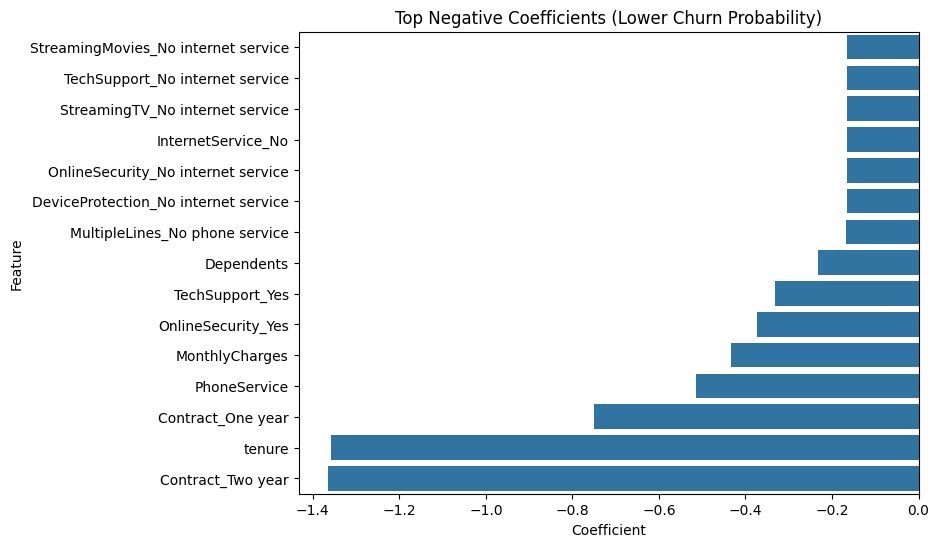

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(data=coef_df.tail(15), x="Coefficient", y="Feature")
plt.title("Top Negative Coefficients (Lower Churn Probability)")
plt.show()


In [35]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


e:\Python\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


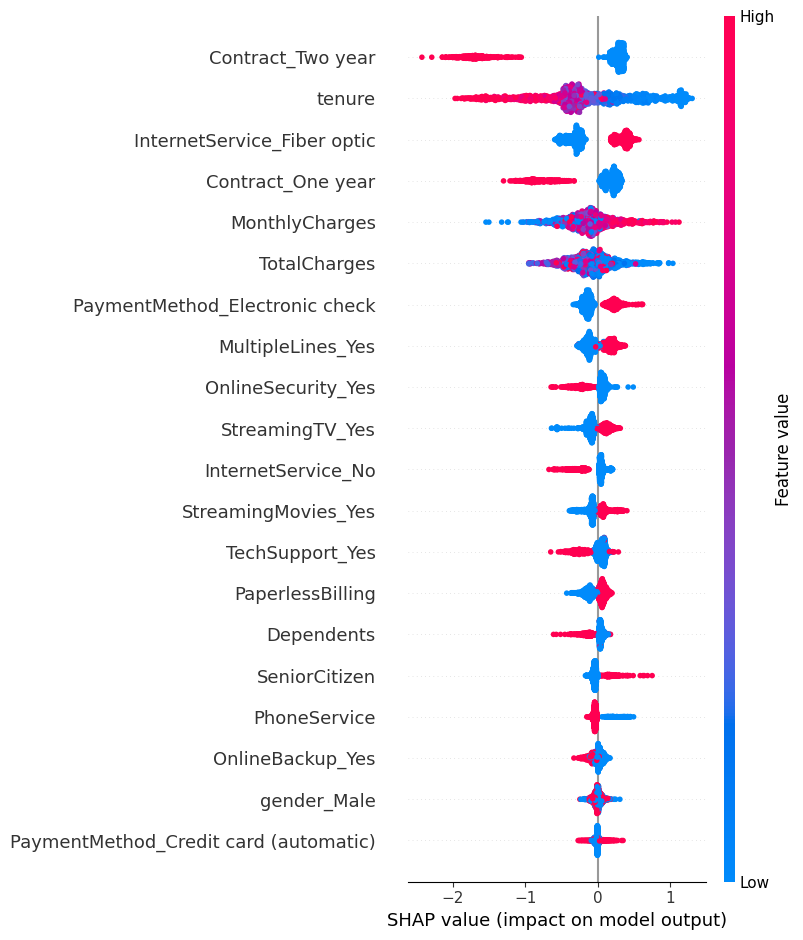

In [36]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
